# Prediction of Domestic Blow Modeling Price

This tutortial is based on industry data. Data can't be shared. I have used Lazypredict package to find suitable ML algorithm for data. Please refer my work similar to Lazypredict in Github. I have also used Bidirectional LSTM and GRU. I have also used a new metric in this tutorial. It is Mean Directional Accuracy (MDA). MDA compare the direction of your model (upward or downward) with the actual realized direction.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from lazypredict.Supervised import LazyRegressor

In [2]:
Path = "D:/Tumpa"
Filename = "Random Price Dataset Trial Assignment"

In [3]:
data = pd.read_excel(os.path.join(Path,Filename+".xlsx"),sheet_name="Raw data")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 50 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype         
---  ------                                                                                                                      --------------  -----         
 0   Date                                                                                                                        276 non-null    datetime64[ns]
 1   Domestic Market (Contract) Blow Molding, Low                                                                                276 non-null    float64       
 2   Spot/Export Blow Molding                                                                                                    185 non-null    float64       
 3   Spot, Domestic                                                                            

In [4]:
#convert object to float
for col in data.columns:
    if data[col].dtype == np.object:
        print(f"Column name : {col} Type: object")
        data[col] = pd.to_numeric(data[col],errors='coerce')


Column name : Australia _export Type: object
Column name : Saudi_export Type: object


In [5]:
#Plot histogram of all numeric field
target = data['Domestic Market (Contract) Blow Molding, Low']
data.drop(["Date","South_korea_import","Domestic Market (Contract) Blow Molding, Low","Saudi_export"],axis=1,inplace=True)


In [6]:
data = data.interpolate(method='linear',axis=0).ffill().bfill()

array([[<AxesSubplot:title={'center':'Spot/Export Blow Molding'}>,
        <AxesSubplot:title={'center':'Spot, Domestic'}>,
        <AxesSubplot:title={'center':'WTISPLC'}>,
        <AxesSubplot:title={'center':'MCOILBRENTEU'}>,
        <AxesSubplot:title={'center':'GASREGM'}>,
        <AxesSubplot:title={'center':'IMPCH'}>,
        <AxesSubplot:title={'center':'EXPCH'}>],
       [<AxesSubplot:title={'center':'PRUBBUSDM'}>,
        <AxesSubplot:title={'center':'WPUFD4111'}>,
        <AxesSubplot:title={'center':'PCU325211325211'}>,
        <AxesSubplot:title={'center':'PCU32611332611301'}>,
        <AxesSubplot:title={'center':'WPU0915021625'}>,
        <AxesSubplot:title={'center':'PCU3252132521'}>,
        <AxesSubplot:title={'center':'MHHNGSP'}>],
       [<AxesSubplot:title={'center':'WPU072205011'}>,
        <AxesSubplot:title={'center':'PCU32611132611115'}>,
        <AxesSubplot:title={'center':'PCU32611332611301.1'}>,
        <AxesSubplot:title={'center':'PCU32611132611112'}>,
  

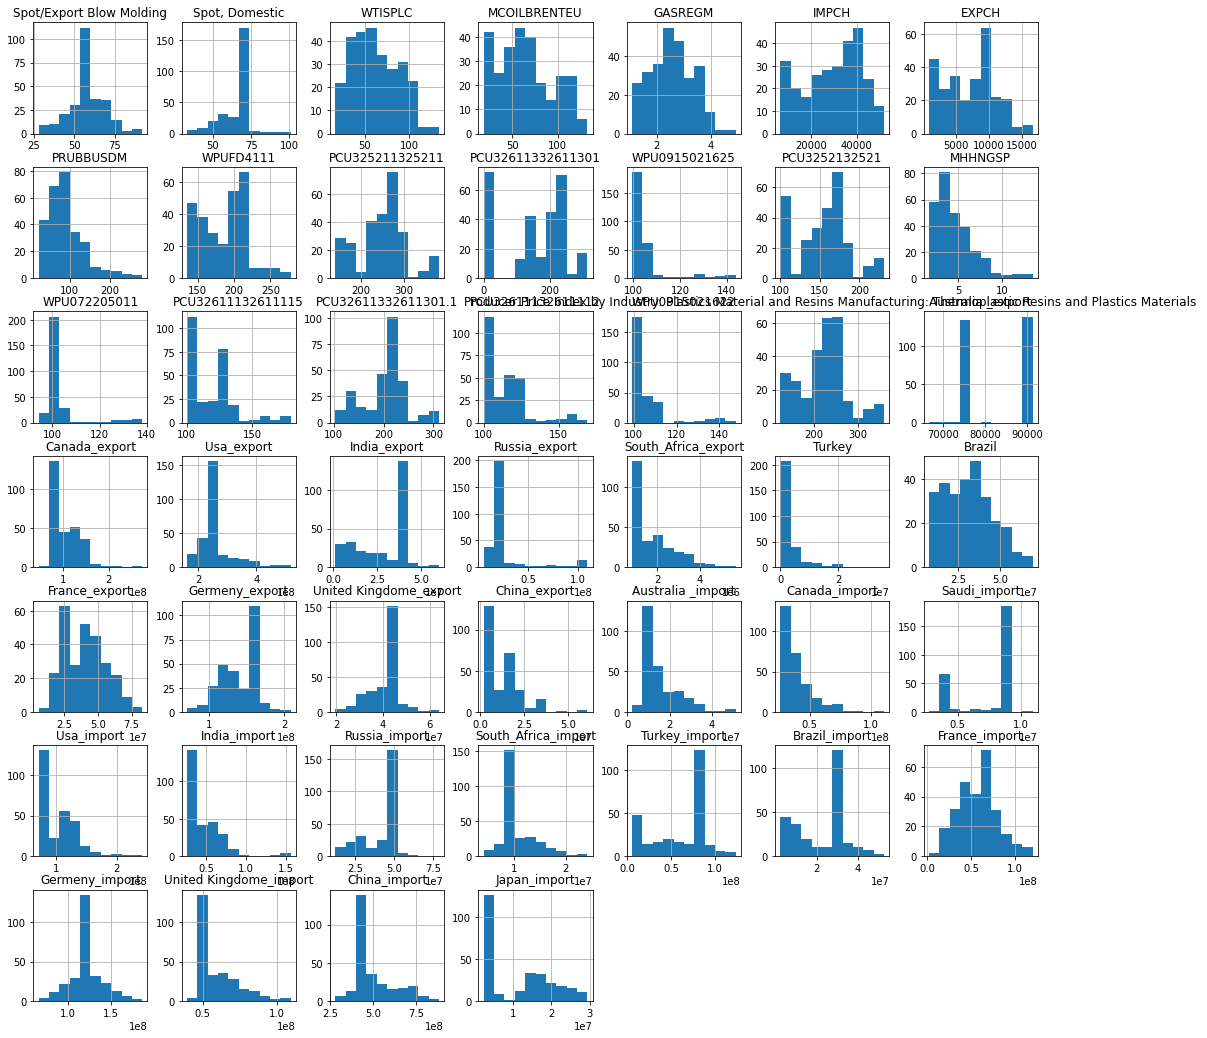

In [7]:
data.hist(figsize=(18,18))

In [8]:
#Check for outliers
data.describe()

,Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,WPUFD4111,PCU325211325211,...,India_import,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import
count,276.00,276.00,276.00,276.00,276.00,276.00,276.00,276.00,276.00,276.00,...,276.00,276.00,276.00,276.00,276.00,276.00,276.00,276.00,276.00,276.00
mean,57.07,65.69,62.51,65.40,2.57,29618.29,7206.93,89.49,186.31,249.57,...,49169532.26,40983721.29,11012031.50,58800992.29,23507495.73,56619306.28,121820946.44,60974082.84,511587301.27,11300619.75
std,11.08,9.77,26.07,29.61,0.78,12288.96,3791.27,46.33,32.14,55.49,...,21819124.20,10717208.35,3282277.39,29881844.39,12020172.69,22743429.43,18799449.75,12567330.22,111756602.49,8439384.43
min,28.00,33.25,16.55,18.38,1.09,6375.60,863.10,22.12,135.00,141.20,...,25234581.00,12229302.00,4023189.00,5210434.00,2565068.00,1864643.00,65210245.00,39468459.00,279099036.00,2288267.00
25%,53.38,61.00,41.00,42.73,1.98,20519.93,3686.54,60.90,155.73,222.85,...,35649297.00,34258977.50,9723836.00,33802136.00,11023104.25,37306672.00,114680085.25,52677816.00,452461873.00,3133547.00
50%,54.00,70.00,59.28,62.77,2.56,31693.84,8082.04,78.29,193.45,259.05,...,35649297.00,47176610.00,9723836.00,77326447.00,30865380.00,58925858.50,122744998.00,53079544.00,452461873.00,11863324.50
75%,64.00,70.00,84.17,85.59,3.15,39559.55,9743.73,107.52,208.75,279.30,...,58160377.00,47176610.00,12332582.75,77326447.00,30865380.00,70959783.25,128104787.00,67311123.00,554917021.75,18219726.50
max,92.00,100.75,133.93,132.72,4.93,52081.07,16678.51,280.79,278.02,380.76,...,156434480.00,78709398.00,24171190.00,123408598.00,52624471.00,119485832.00,186689633.00,109421098.00,886559172.00,29436583.00


If mean > 50% or 75% > max then outlier is present

<AxesSubplot:>

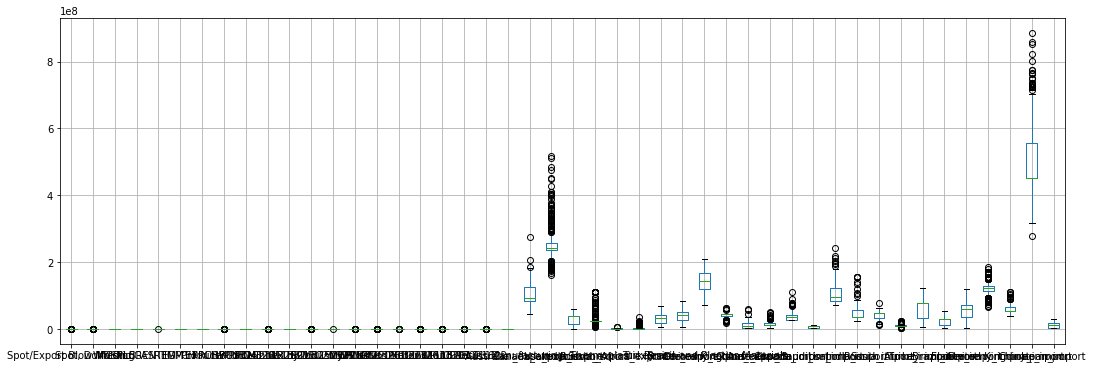

In [9]:
data.boxplot(figsize=(18,6))

In [10]:
#Remove highly correlated fields to avoid multiple collinearity
def auto_removal_correlated_fields(data,threshold=0.8):
    corr = data.corr()
    drop_cols = []
    num_col = [i for i in data.columns]
    for col in data.columns:
        for i in range(len(corr)):
            if abs(corr[col].iloc[i]) > threshold and col != num_col[i]:
                drop_cols.append(num_col[i])

    cols = list(set(data.columns)-set(drop_cols))
    return data[cols]

In [11]:
data = auto_removal_correlated_fields(data,threshold=0.8)

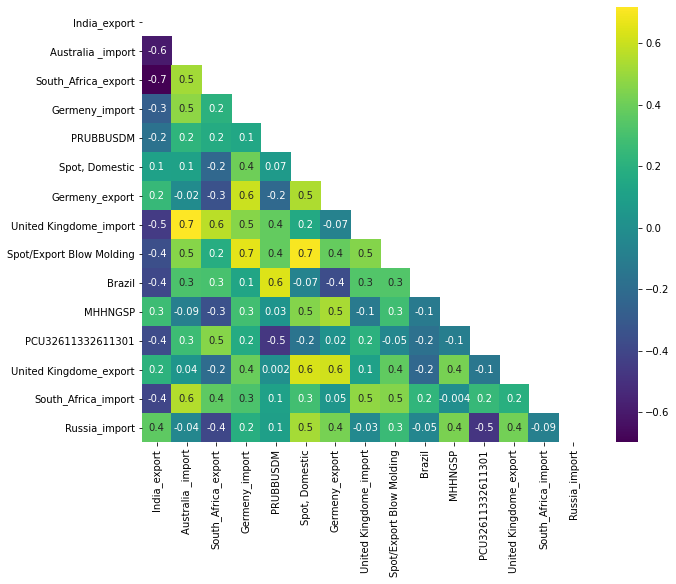

In [12]:
corr = data.corr()
plt.figure(figsize=(10,8))
umask =np.triu(corr)
sb.heatmap(corr,annot=True,fmt="0.1g",cmap="viridis",mask=umask)
plt.show()

In [13]:
#Using LazyPredict
X = data.to_numpy()
X = X.astype(np.float32)
Y = target.to_numpy()
data_size = int(len(data)*0.8)
X_train,X_test = X[:data_size],X[data_size:]
Y_train,Y_test = Y[:data_size],Y[data_size:]
reg = LazyRegressor(verbose=0,ignore_warnings=False,custom_metric=None)
models,predictions = reg.fit(X_train,X_test,Y_train,Y_test)
predictions[['R-Squared', 'RMSE', 'Time Taken']]

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:02<00:00, 18.46it/s]


,R-Squared,RMSE,Time Taken
Model,,,
KNeighborsRegressor,0.69,9.63,0.01
ExtraTreesRegressor,0.68,9.82,0.09
LGBMRegressor,0.61,10.82,0.02
HistGradientBoostingRegressor,0.58,11.25,0.13
XGBRegressor,0.55,11.61,1.22
AdaBoostRegressor,0.53,11.81,0.06
GradientBoostingRegressor,0.52,11.92,0.05
TweedieRegressor,0.42,13.12,0.01
RandomForestRegressor,0.39,13.45,0.12


In [14]:
target

0     41.00
1     41.00
2     45.00
3     47.00
4     47.00
       ... 
271   93.00
272   90.00
273   90.00
274   90.00
275   90.00
Name: Domestic Market (Contract) Blow Molding, Low, Length: 276, dtype: float64

In [15]:
data_size = int(len(data)*0.8)
X = data.to_numpy()
Y = target.to_numpy()
x_train = X[:data_size]
x_test = X[data_size:]
y_train = Y[:data_size]
y_test = Y[data_size:]

In [16]:
#Machine Learning Approach as per LazyPredict
from sklearn.neighbors import KNeighborsRegressor
neighbors = [2,3,4,5,6,7,8,9,10]
result={}
for neigh in neighbors:
    model_knn = KNeighborsRegressor(neigh)
    y_hat = model_knn.fit(x_train,y_train).predict(x_test)
    rmse = np.sqrt(np.square(y_test-y_hat).mean())
    result[neigh] = rmse

result
    

{2: 10.539201904590039,
 3: 9.940572426109581,
 4: 10.148204230657898,
 5: 10.363552204032857,
 6: 10.364787477051541,
 7: 10.182728295469667,
 8: 10.263571019239079,
 9: 10.612490041708474,
 10: 10.495562412617195}

In [17]:
model_knn = KNeighborsRegressor(3)
y_hat = model_knn.fit(x_train,y_train).predict(x_test)
rmse =  np.sqrt(np.square(y_test-y_hat).mean())
rmse

9.940572426109581

In [18]:
def mean_directional_accuracy(actual:np.ndarray,predicted:np.ndarray,model_name:str):
    '''Mean Directional Accuracy '''
    if type(actual) != np.ndarray:
        actual = np.ndarray(actual)
    if type(predicted) != np.ndarray:
        predicted = np.ndarray(predicted)
    mda = np.mean((np.sign(actual[1:]-actual[:-1]) == np.sign(predicted[1:]-predicted[:-1])).astype(int))
    print(f" MDA for {model_name} is {mda}")

In [19]:
mean_directional_accuracy(y_test,y_hat,"KNN-3")

 MDA for KNN-3 is 0.4


In [20]:
#Using Deep Learning Approach to reduce RMSE further
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,layers,callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout,GRU,Bidirectional
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [21]:
tf.random.set_seed(4434)

In [22]:
target = pd.DataFrame(target)
target.columns = ['Domestic Market (Contract) Blow Molding, Low']


In [23]:
'''Normalized data - MinMaxScalar -- (number of samples,number of features)'''
scaler_x = MinMaxScaler().fit(data)
scaler_y = MinMaxScaler().fit(target[['Domestic Market (Contract) Blow Molding, Low']])



In [24]:
scaled_data = scaler_x.transform(data)
scaled_target = scaler_y.transform(target)

In [25]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
     X = []
     y = []
     start = start + window
     if end is None:
         end = len(dataset) - horizon
     for i in range(start, end):
         indices = range(i-window, i)
         X.append(dataset[indices])
         indicey = range(i+1, i+1+horizon)
         y.append(target[indicey])
     return np.array(X), np.array(y) 

In [26]:
hist_window = 2
horizon = 1
TRAIN_SPLIT = int(len(data)*0.8)
x_train, y_train = custom_ts_multi_data_prep(scaled_data,scaled_target, 0, TRAIN_SPLIT, hist_window, horizon)
x_vali, y_vali = custom_ts_multi_data_prep(scaled_data,scaled_target, TRAIN_SPLIT, None, hist_window, horizon) 

In [27]:
x_vali.shape

(53, 2, 15)

In [28]:
x_train.shape

(218, 2, 15)

In [29]:
y_train.shape

(218, 1, 1)

In [30]:
'''Create BIDIRECTIONAL and GRU Model'''
def bidirectional_lstm(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=units,return_sequences=True),input_shape=(x_train.shape[1],x_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(units=units)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam',loss='mse')
    return model

model_bidirectional = bidirectional_lstm(64)


In [31]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience=10)
    history = model.fit(x_train,y_train,epochs=100,validation_split=0.2,batch_size=16,shuffle=False,callbacks=[early_stop])
    return history

In [32]:
history_bidirectional = fit_model(model_bidirectional)

Epoch 1/100
11/11 [==============================] - 5s 86ms/step - loss: 0.0776 - val_loss: 0.0088
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1055 - val_loss: 0.0130
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0616 - val_loss: 0.0181
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0378 - val_loss: 0.0113
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0309 - val_loss: 0.0132
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0295 - val_loss: 0.0147
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0232 - val_loss: 0.0189
Epoch 8/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0248 - val_loss: 0.0175
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0189 - val_loss: 0.0206
Epoch 10/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0191 - val_loss: 0.0207
Epoch 11

In [33]:
def plot_history(history,model_name):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Train vs Validation Loss for' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss','Validation Loss'],loc='upper right')
    plt.show()

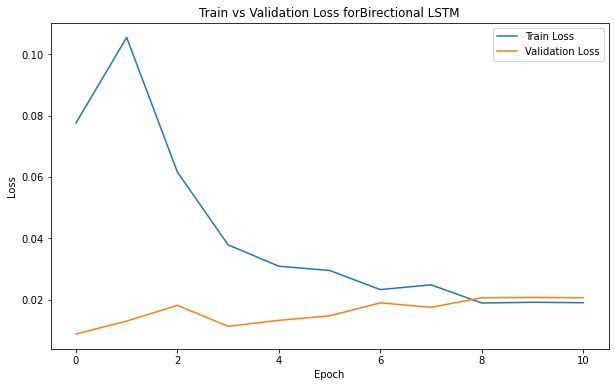

In [34]:
plot_history(history_bidirectional,'Birectional LSTM')

In [35]:
def predict(model):
    y_hat = model.predict(x_vali)
    y_hat = scaler_y.inverse_transform(y_hat)
    return y_hat

In [36]:
prediction_bidirectional = predict(model_bidirectional)

2/2 [==============================] - 1s 2ms/step


In [37]:
y_test = scaler_y.inverse_transform(y_vali.reshape(-1,1))


In [38]:
def plot_prediction(prediction,y_test,model_name):
    
    plt.figure(figsize=(10,6))
    x = np.arange(len(prediction))
    plt.plot(x,np.array(y_test),label = 'Actual')
    plt.plot(x,np.array(prediction),label = 'Predicted')
    plt.title('Predicted')
    plt.legend()
    plt.xlabel('Time (day)')
    plt.ylabel('Domestic Blow Modeling Price')
    plt.show()

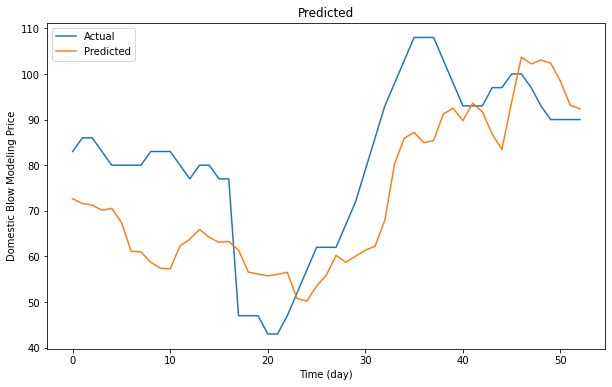

In [39]:
plot_prediction(prediction_bidirectional,y_test,'Birectional LSTM')

In [40]:
def evaluate(prediction,actual,model_name):
    error = prediction - actual
    mse = np.square(error).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(error).mean()
    print(f"Model Name : {model_name}")
    print(f"Mean Absolute Error : {mae}")
    print(f"Root Mean Squared Error : {rmse}")

In [41]:
evaluate(prediction_bidirectional,y_test,"Bidirectional LSTM")

Model Name : Bidirectional LSTM
Mean Absolute Error : 12.35127092757315
Root Mean Squared Error : 14.099016333256085


In [42]:
def gru_model(units):
    model = Sequential()
    model.add(GRU(units=units,return_sequences=True,input_shape=[x_train.shape[1],x_train.shape[2]]))
    model.add(Dropout(0.2))
    model.add(GRU(units=units))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam',loss='mse')
    return model

In [43]:
model_gru = gru_model(64)

In [44]:
history_gru = fit_model(model_gru)

Epoch 1/100
11/11 [==============================] - 3s 61ms/step - loss: 0.0350 - val_loss: 0.0489
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1912 - val_loss: 0.0262
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0671 - val_loss: 0.0289
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0309 - val_loss: 0.0106
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0344 - val_loss: 0.0116
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0301 - val_loss: 0.0129
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0235 - val_loss: 0.0170
Epoch 8/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0254 - val_loss: 0.0165
Epoch 9/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0223 - val_loss: 0.0192
Epoch 10/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0212 - val_loss: 0.0217
Epoch 11

In [45]:
prediction_gru = predict(model_gru)

2/2 [==============================] - 0s 3ms/step


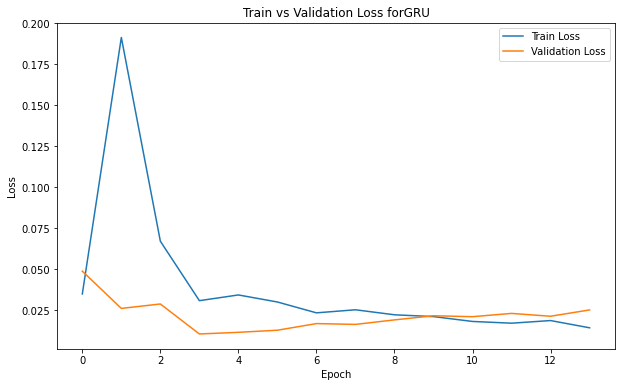

In [46]:
plot_history(history_gru,'GRU')

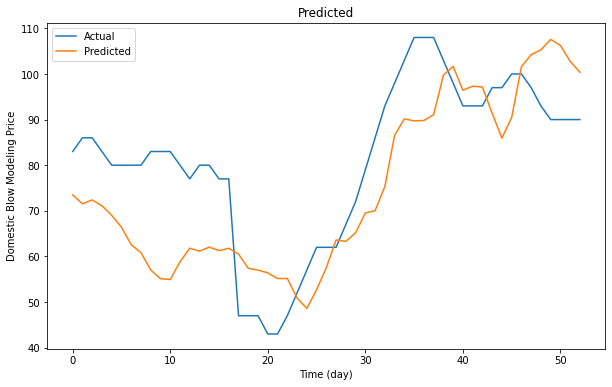

In [47]:
plot_prediction(prediction_gru,y_test,'GRU')

In [48]:
evaluate(prediction_gru,y_test,"GRU")

Model Name : GRU
Mean Absolute Error : 12.143989850889962
Root Mean Squared Error : 13.718486982336248


In [49]:
mean_directional_accuracy(y_test,prediction_bidirectional,'Bidirectional LSTM')


 MDA for Bidirectional LSTM is 0.34615384615384615


In [50]:
mean_directional_accuracy(y_test,prediction_gru,'GRU')

 MDA for GRU is 0.28846153846153844
